Importing the libraries.

In [64]:
import tensorflow as tf
from tensorflow import keras
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

Data Collection

In [65]:
import datetime
now = datetime.datetime.now()
date = str(now).split(' ')[0]
time_str = f'{date} 05:30:00'
time = datetime.datetime.strptime(time_str, '%Y-%m-%d %H:%M:%S')
curr_time = round(time.timestamp())

In [66]:
periods = {
   '%5ENSEI':{
        'period1':1189987200,
        'period2':curr_time,
   }
}

Loading the dataset.

In [67]:
!pip install fake_useragent
import requests
from fake_useragent import UserAgent

def download_file(stock_name):
    global curr_time
    ua_str = UserAgent().chrome
    file_url = f"https://query1.finance.yahoo.com/v7/finance/download/{stock_name}?period1={periods[stock_name]['period1']}&period2={curr_time}&interval=1d&events=history&includeAdjustedClose=true"
    r = requests.get(file_url, headers={'User-Agent':ua_str})

    with open (stock_name+'.csv', 'wb') as f:
        f.write(r.content)

In [68]:
stock_name = '%5ENSEI'
# stock_name = 'RELIANCE.NS'
download_file(stock_name)

Exploring Dataset

In [69]:
df = pd.read_csv(stock_name+'.csv')
df.info


<bound method DataFrame.info of             Date          Open          High           Low         Close  \
0     2007-09-17   4518.450195   4549.049805   4482.850098   4494.649902   
1     2007-09-18   4494.100098   4551.799805   4481.549805   4546.200195   
2     2007-09-19   4550.250000   4739.000000   4550.250000   4732.350098   
3     2007-09-20   4734.850098   4760.850098   4721.149902   4747.549805   
4     2007-09-21   4752.950195   4855.700195   4733.700195   4837.549805   
...          ...           ...           ...           ...           ...   
4067  2024-03-06  22327.500000  22497.199219  22224.349609  22474.050781   
4068  2024-03-07  22505.300781  22525.650391  22430.000000  22493.550781   
4069  2024-03-11  22517.500000  22526.599609  22307.250000  22332.650391   
4070  2024-03-12  22334.449219  22452.550781  22256.000000  22335.699219   
4071  2024-03-13  22432.199219  22446.750000  21905.650391  21997.699219   

         Adj Close    Volume  
0      4494.649902       0.0  
1      4546.200195       0.0  
2      4732.350098       0.0  
3      4747.549805       0.0  
4      4837.549805       0.0  
...            ...       ...  
4067  22474.050781  312300.0  
4068  22493.550781  379900.0  
4069  22332.650391  277900.0  
4070  22335.699219  299200.0  
4071  21997.699219       0.0  

[4072 rows x 7 columns]>

In [70]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4067,2024-03-06,22327.500000,22497.199219,22224.349609,22474.050781,22474.050781,312300.0
4068,2024-03-07,22505.300781,22525.650391,22430.000000,22493.550781,22493.550781,379900.0
4069,2024-03-11,22517.500000,22526.599609,22307.250000,22332.650391,22332.650391,277900.0
4070,2024-03-12,22334.449219,22452.550781,22256.000000,22335.699219,22335.699219,299200.0
4071,2024-03-13,22432.199219,22446.750000,21905.650391,21997.699219,21997.699219,0.0


In [71]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index = df['Date']
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2024-03-06,2024-03-06,22327.500000,22497.199219,22224.349609,22474.050781,22474.050781,312300.0
2024-03-07,2024-03-07,22505.300781,22525.650391,22430.000000,22493.550781,22493.550781,379900.0
2024-03-11,2024-03-11,22517.500000,22526.599609,22307.250000,22332.650391,22332.650391,277900.0
2024-03-12,2024-03-12,22334.449219,22452.550781,22256.000000,22335.699219,22335.699219,299200.0
2024-03-13,2024-03-13,22432.199219,22446.750000,21905.650391,21997.699219,21997.699219,0.0


In [72]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4.042000e+03
mean,9448.867492,9500.932571,9381.488772,9442.679680,9442.679680,1.999988e+05
std,4752.858067,4763.419818,4733.516120,4749.728339,4749.728339,2.105223e+05
min,2553.600098,2585.300049,2252.750000,2524.199951,2524.199951,0.000000e+00
25%,5527.712524,5565.724975,5477.650024,5526.775024,5526.775024,0.000000e+00
50%,8267.200195,8315.050293,8217.100098,8264.950195,8264.950195,1.717000e+05
75%,11600.550293,11640.149658,11534.062744,11582.862793,11582.862793,2.776000e+05
max,22517.500000,22526.599609,22430.000000,22493.550781,22493.550781,1.811000e+06


In [73]:
dataset = pd.DataFrame(df[['Close']])
dataset.tail()

,Close
Date,
2024-03-06,22474.050781
2024-03-07,22493.550781
2024-03-11,22332.650391
2024-03-12,22335.699219
2024-03-13,21997.699219


Analyzing the field "close" of the dataset.

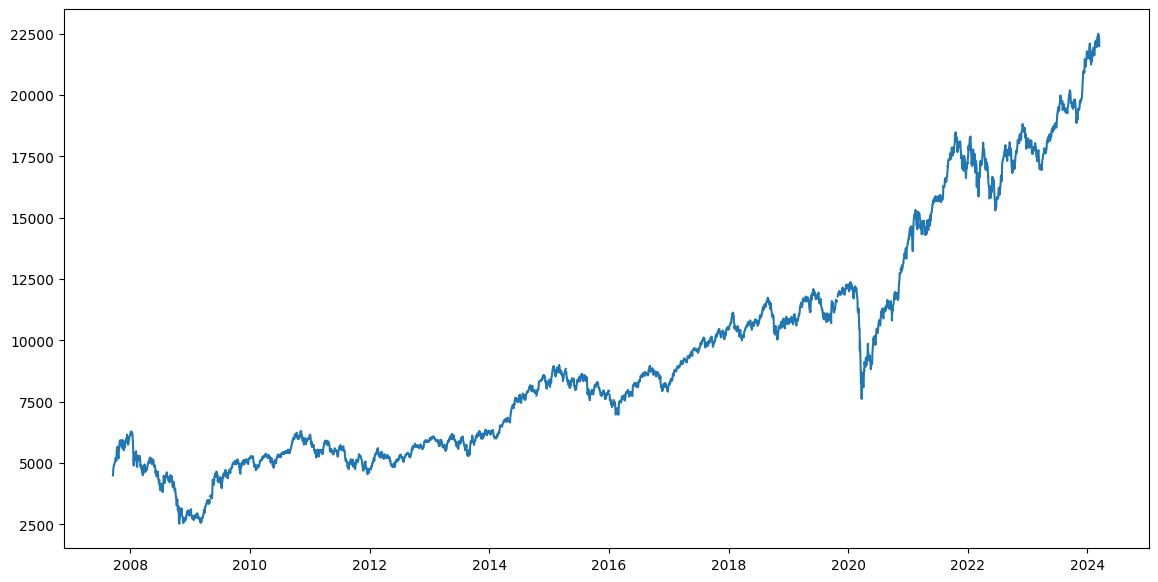

In [74]:
plt.figure(figsize=(14,7))
plt.plot(dataset,label='Close Price history')

In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4072 entries, 2007-09-17 to 2024-03-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   4042 non-null   float64
dtypes: float64(1)
memory usage: 63.6 KB


Data Preprocessing

In [76]:
dataset = dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4042 entries, 2007-09-17 to 2024-03-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   4042 non-null   float64
dtypes: float64(1)
memory usage: 63.2 KB


In [77]:
dataset.tail()

,Close
Date,
2024-03-06,22474.050781
2024-03-07,22493.550781
2024-03-11,22332.650391
2024-03-12,22335.699219
2024-03-13,21997.699219


In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)
scaled_data[:5]

array([[0.09867371],
       [0.10125518],
       [0.11057696],
       [0.11133811],
       [0.11584502]])

In [79]:
window_size = 50

x_data, y_data = [],[]

for i in range(window_size, len(scaled_data)):
    x_data.append(scaled_data[i-window_size:i,0])
    y_data.append(scaled_data[i,0])

x_data, y_data = np.array(x_data), np.array(y_data)

x_data = np.reshape(x_data, (x_data.shape[0], x_data.shape[1], 1))
y_data = np.reshape(y_data, (y_data.shape[0], 1))

x_data.shape, y_data.shape

((3992, 50, 1), (3992, 1))

Splitting data for training

In [80]:
train_size = 0.8

x_train, x_test = x_data[:(int)(len(x_data)*train_size)], x_data[(int)(len(x_data)*train_size):]
y_train, y_test = y_data[:(int)(len(y_data)*train_size)], y_data[(int)(len(y_data)*train_size):]

y_original = dataset[window_size + len(y_train):]

x_train.shape, y_train.shape, x_test.shape, y_test.shape, y_original.shape

((3193, 50, 1), (3193, 1), (799, 50, 1), (799, 1), (799, 1))

Implementation of LSTM model

In [86]:
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

model=Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.1))
model.add(LSTM(units=50))
model.add(Dense(1))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 50, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_15 (LSTM)              (None, 50)                20200     
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [95]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.fit(x_train, y_train, epochs=60, batch_size=128, verbose=2)

Epoch 1/60
25/25 - 7s - loss: 9.8540e-05 - mae: 0.0075 - 7s/epoch - 280ms/step
Epoch 2/60
25/25 - 3s - loss: 5.7518e-05 - mae: 0.0056 - 3s/epoch - 119ms/step
Epoch 3/60
25/25 - 2s - loss: 5.4240e-05 - mae: 0.0054 - 2s/epoch - 82ms/step
Epoch 4/60
25/25 - 2s - loss: 5.5671e-05 - mae: 0.0055 - 2s/epoch - 79ms/step
Epoch 5/60
25/25 - 2s - loss: 5.5518e-05 - mae: 0.0054 - 2s/epoch - 76ms/step
Epoch 6/60
25/25 - 2s - loss: 6.5750e-05 - mae: 0.0060 - 2s/epoch - 79ms/step
Epoch 7/60
25/25 - 3s - loss: 6.2187e-05 - mae: 0.0058 - 3s/epoch - 104ms/step
Epoch 8/60
25/25 - 3s - loss: 5.7685e-05 - mae: 0.0056 - 3s/epoch - 138ms/step
Epoch 9/60
25/25 - 2s - loss: 5.4291e-05 - mae: 0.0055 - 2s/epoch - 77ms/step
Epoch 10/60
25/25 - 2s - loss: 5.6326e-05 - mae: 0.0056 - 2s/epoch - 79ms/step
Epoch 11/60
25/25 - 2s - loss: 5.3673e-05 - mae: 0.0054 - 2s/epoch - 79ms/step
Epoch 12/60
25/25 - 2s - loss: 5.5309e-05 - mae: 0.0055 - 2s/epoch - 74ms/step
Epoch 13/60
25/25 - 2s - loss: 5.9313e-05 - mae: 0.0057 -

In [96]:
y_pred = model.predict(x_test)
print('Loss: ', sum(keras.losses.mse(y_test, y_pred))/len(y_pred))

25/25 [==============================] - 1s 14ms/step
Loss:  tf.Tensor(7.774256e-05, shape=(), dtype=float32)


In [97]:
closing_price = scaler.inverse_transform(y_pred)
print(closing_price[:5])

[[13798.235]
 [13433.687]
 [13403.787]
 [13581.241]
 [13780.355]]


Visualization

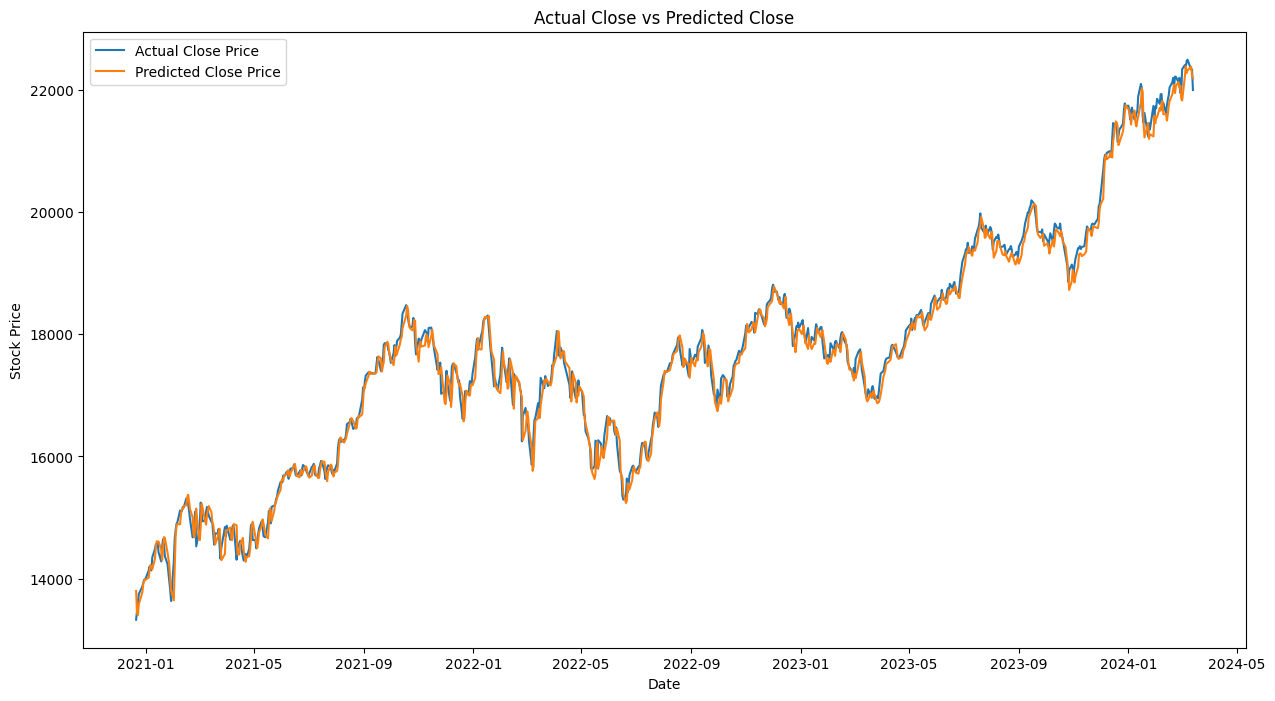

In [100]:
validation = y_original
validation['Predictions'] = closing_price

plt.figure(figsize=(15,8))
plt.plot(validation['Close'], label="Actual Close Price")
plt.plot(validation['Predictions'], label="Predicted Close Price")
plt.title("Actual Close vs Predicted Close")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()